# Advanced Lane Detection

## Pipeline

#### Setup
1. Calibrate camera

#### Image Processing
1. Undistort image
2. Apply thresholds  
  a. Gradient  
  b. Magnitude  
  c. Direction  
  d. S-Channel  
3. ????  
4. Profit   


## Camera Calibration

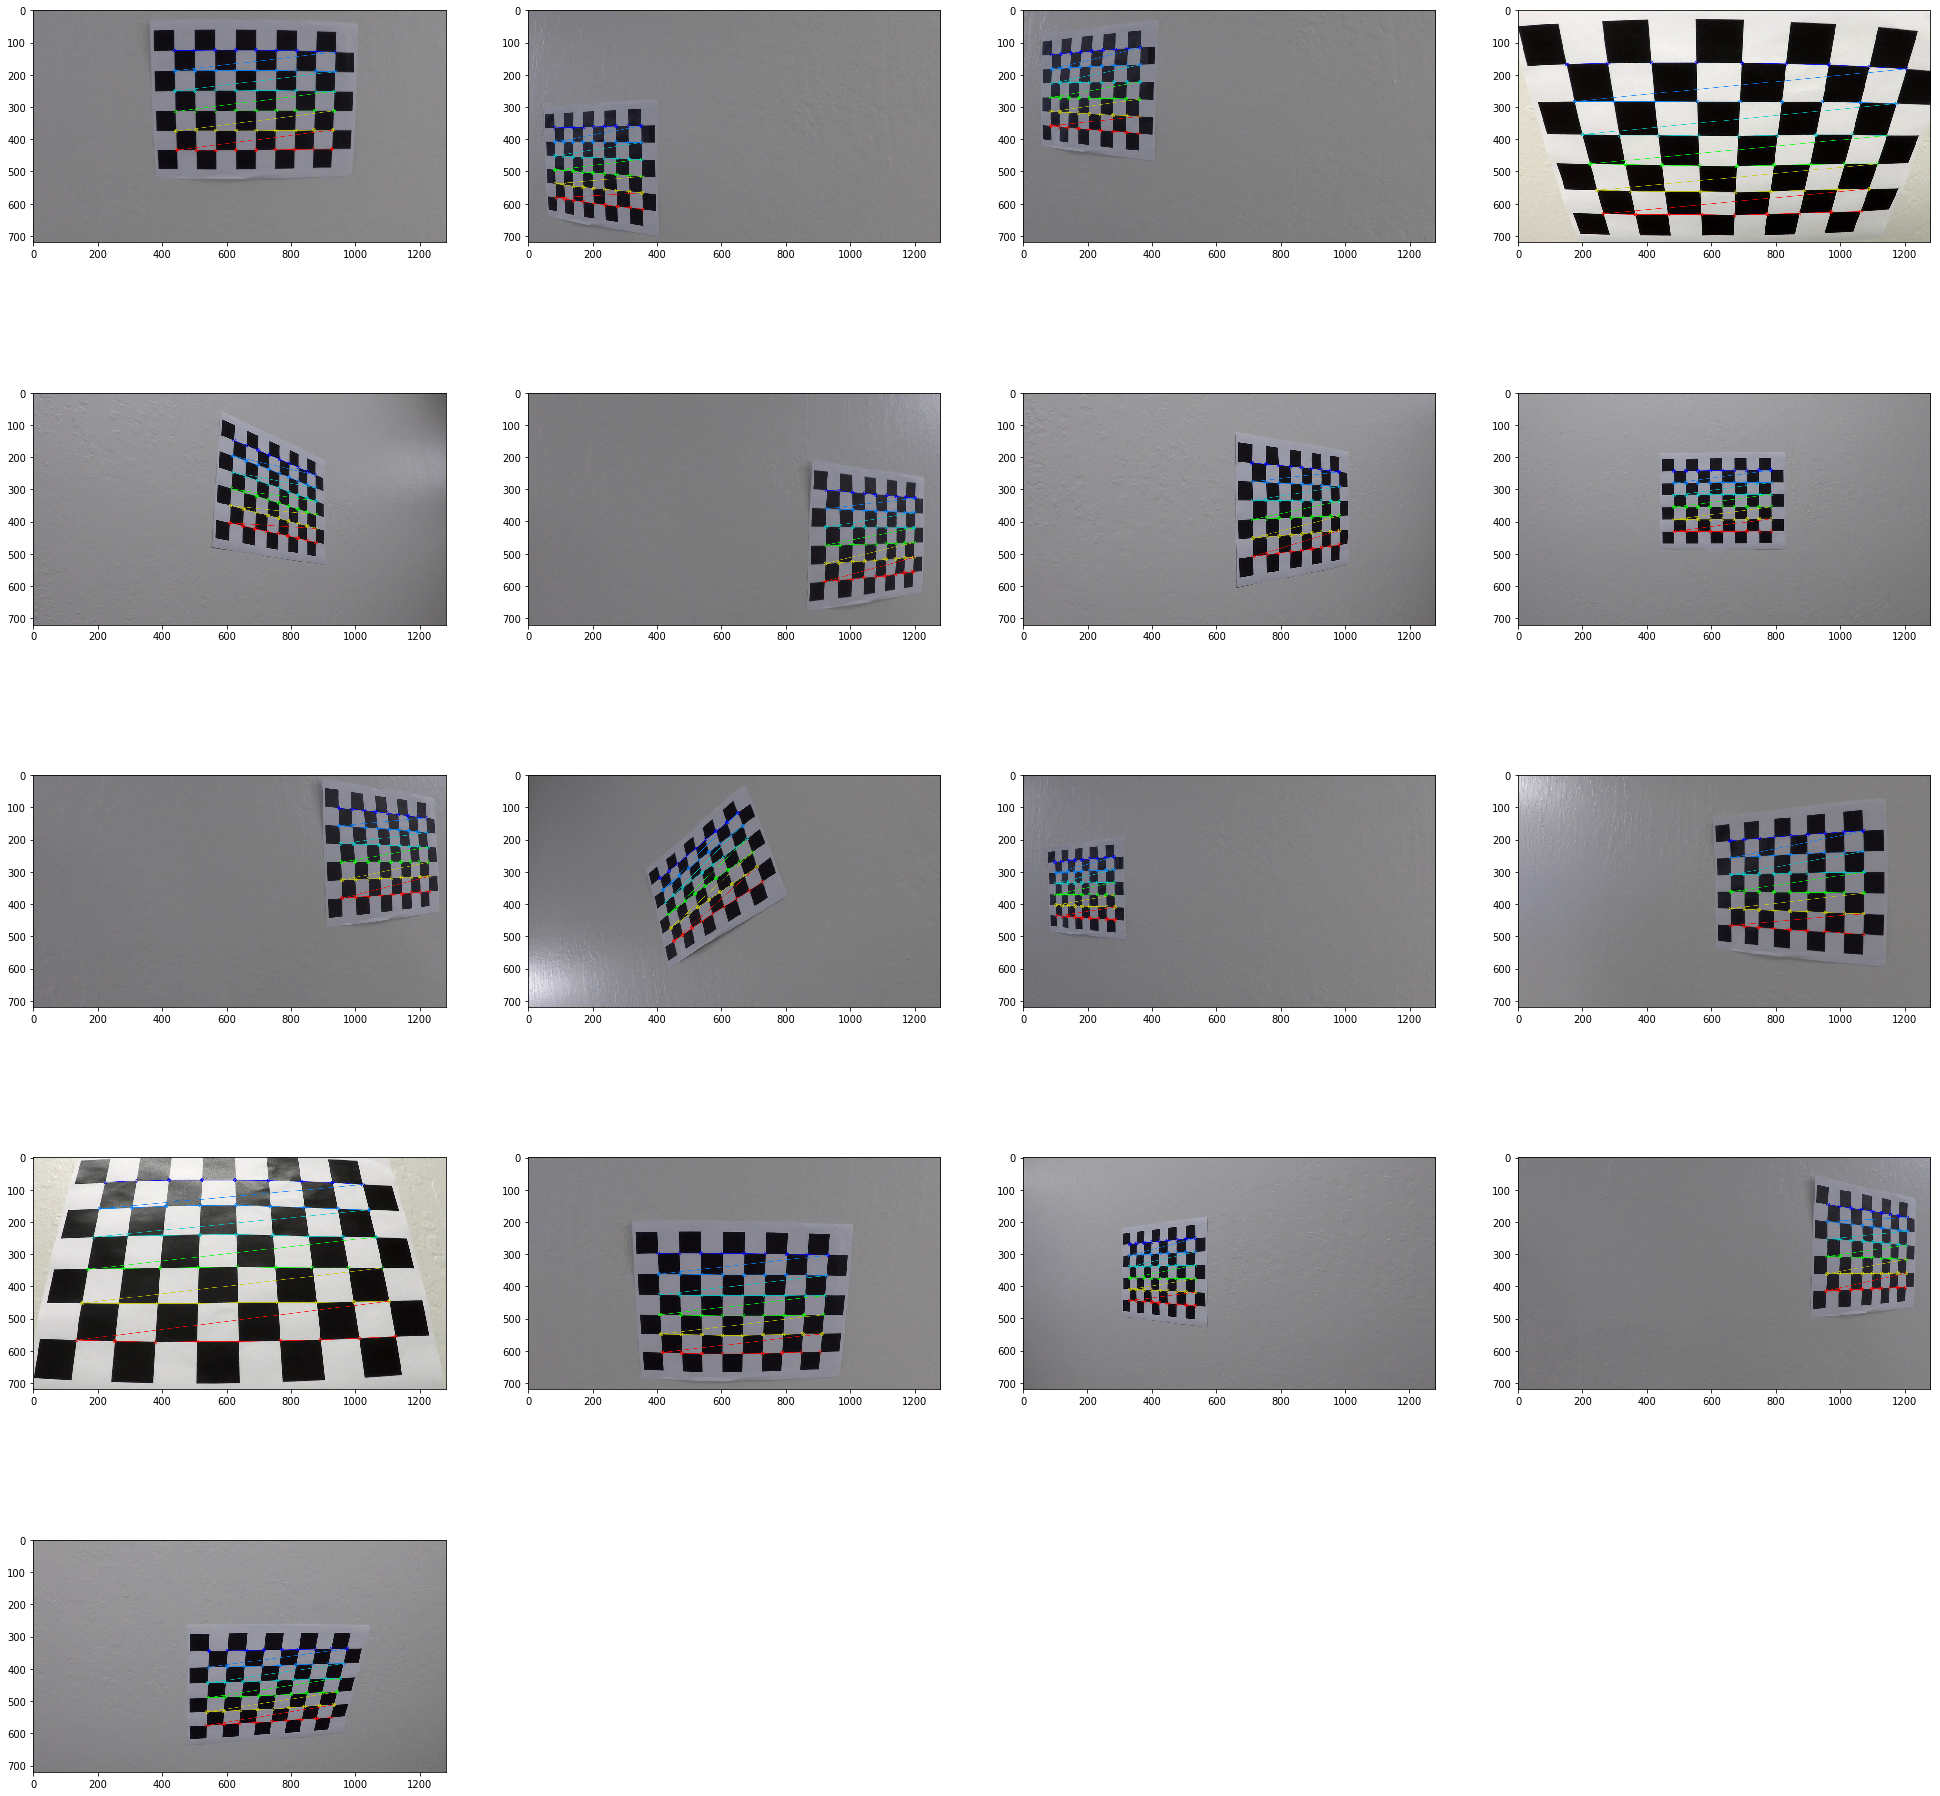

In [1]:
from camera import Camera
from threshold import Threshold
from plot import plot_images, plot_image
from image import load_images, load_image
import os
import glob
import numpy as np
%matplotlib inline

file_root = os.path.dirname(os.path.abspath(os.path.abspath('')))
calibration_images = load_images(glob.glob(os.path.join(file_root, './camera_cal/calibration*.jpg')))
pattern_size = (9, 6)

camera = Camera()
chessboard_images = camera.calibrate(calibration_images, pattern_size)
plot_images(chessboard_images, 4)



## Original Test Images

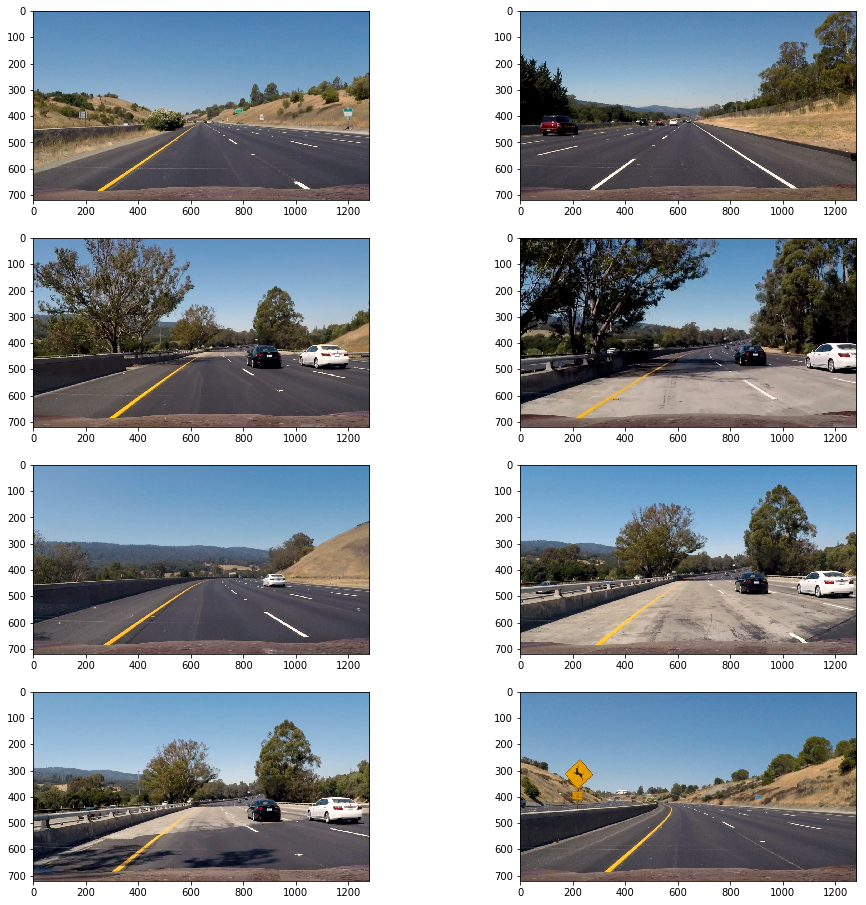

In [2]:

test_images = load_images(glob.glob(os.path.join(file_root, './test_images/*.jpg')))
plot_images(test_images, 2)

## Undistorted Test Images

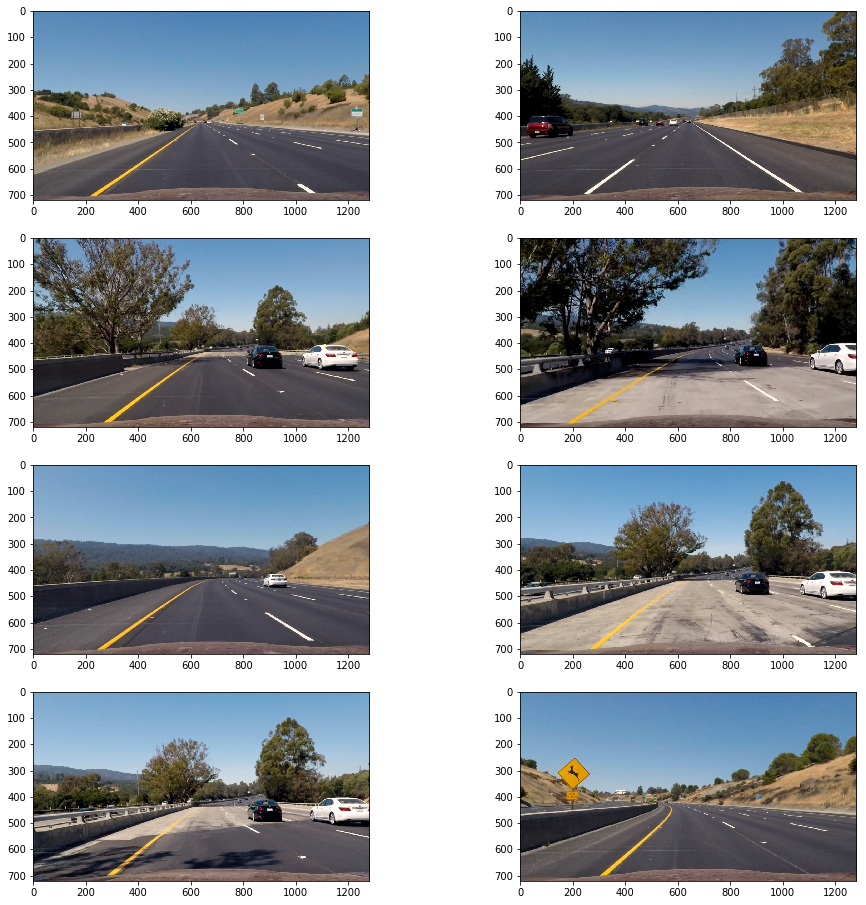

In [3]:

undistorted_images = camera.undistort_images(test_images)
plot_images(undistorted_images, 2)

## Thresholds

### Gradient

### Magnitude  

### Direction  

### S-Channel

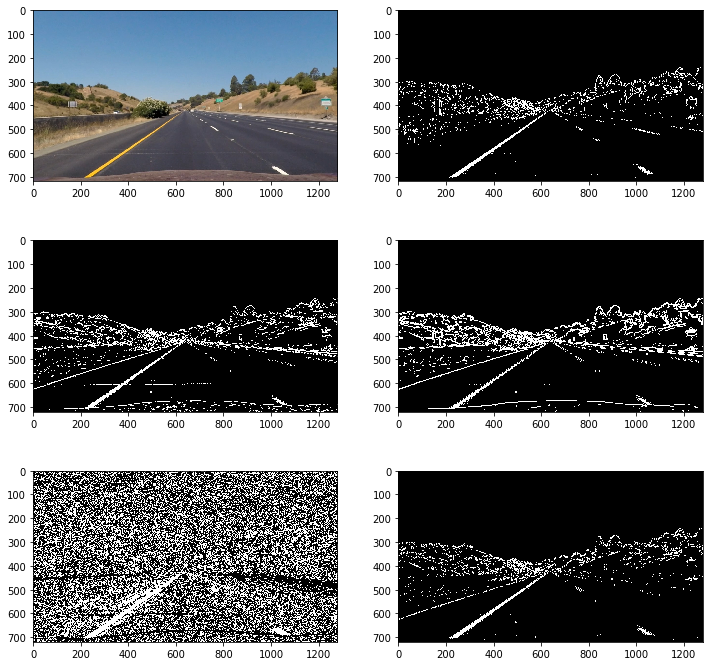

In [4]:

# Hyperparameters
P = []
P.append(3) # Gradient x kernel
P.append((20, 100)) # Gradient x threshold
P.append((170, 255)) # Gradient x S-channel threshold

P.append(3) # Gradient y kernel
P.append((20, 100)) # Gradient y threshold
P.append((170, 255)) # Gradient y S-channel threshold

P.append(9) # Magnitude kernel
P.append((30, 100)) # Magnitude threshold
P.append((170, 255)) # Magnitude S-channel threshold

P.append(15) # Direction kernel
P.append((0.7, 1.3)) # Direction threshold
P.append((170, 255)) # Direction S-channel threshold
# ================================ #

def threshold_pipeline(img, params, plot_steps=False):
    threshold = Threshold()

    grad_x_binary = threshold.gradient(img, 'x', params[0], params[1], params[2])

    grad_y_binary = threshold.gradient(img, 'y', params[3], params[4], params[5])

    mag_binary = threshold.magnitude(img, params[6], params[7], params[8])
    
    dir_binary = threshold.direction(img, params[9], params[10], params[11])

    combined = threshold.combine(grad_x_binary, grad_y_binary, mag_binary, dir_binary)
    
    if plot_steps == True:
        threshold_images = []
        threshold_images.append(test_image)
        threshold_images.append(grad_x_binary)
        threshold_images.append(grad_y_binary)
        threshold_images.append(mag_binary)
        threshold_images.append(dir_binary)
        threshold_images.append(combined)
        plot_images(threshold_images, 2, gray=True)
    
    return combined


test_image = undistorted_images[0]

thresholded_image = threshold_pipeline(test_image, P, plot_steps=True)


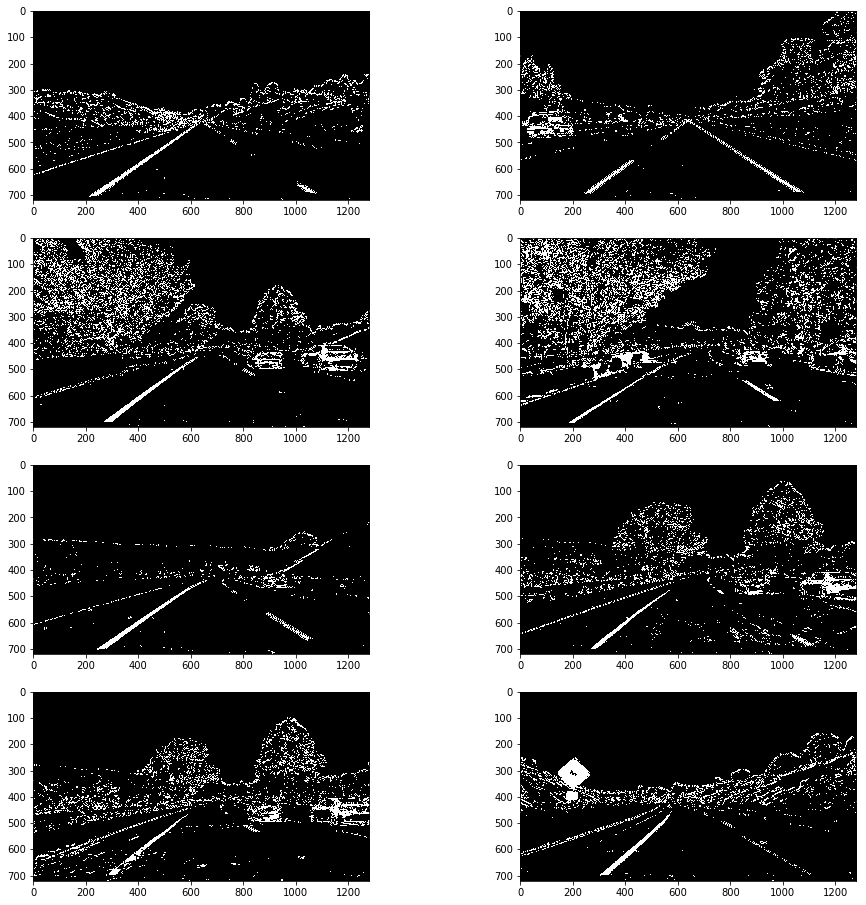

In [5]:
thresholded_images = []

for image in undistorted_images:
    thresholded_images.append(threshold_pipeline(image, P))

    
plot_images(thresholded_images, 2, gray=True)